In [1]:
import pandas as pd 
from plotnine import * 

In [12]:
df_players = pd.read_csv("../Data/player_data.csv")
df_players.drop("Unnamed: 0", axis = 1, inplace = True) 
df_players

,season,slug,name,team,age,%games_played,minutes_played,points,assists,attempted_field_goals,...,player_efficiency_rating,steal_percentage,three_point_attempt_rate,total_rebound_percentage,true_shooting_percentage,turnover_percentage,usage_percentage,value_over_replacement_player,win_shares_per_48_minutes,is_mvp
0,2010,aldrila01,LaMarcus Aldridge,PORTLAND TRAIL BLAZERS,24,0.951220,37.461538,17.858974,2.051282,14.987179,...,18.2,1.3,0.014,13.3,0.535,7.4,22.9,2.3,0.145,0
1,2010,allenra02,Ray Allen,BOSTON CELTICS,34,0.975610,35.237500,16.300000,2.625000,12.162500,...,15.2,1.2,0.410,5.5,0.601,10.6,20.2,2.3,0.135,0
2,2010,anthoca01,Carmelo Anthony,DENVER NUGGETS,25,0.841463,38.173913,28.159420,3.217391,21.768116,...,22.2,1.7,0.125,9.9,0.548,10.6,33.4,2.9,0.145,0
3,2010,arenagi01,Gilbert Arenas,WASHINGTON WIZARDS,28,0.390244,36.531250,22.562500,7.187500,19.250000,...,18.7,1.8,0.294,6.5,0.511,14.2,31.9,1.1,0.072,0
4,2010,arizatr01,Trevor Ariza,HOUSTON ROCKETS,24,0.878049,36.513889,14.888889,3.833333,13.875000,...,13.3,2.4,0.407,8.8,0.488,12.8,21.2,1.7,0.058,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2022,westbru01,Russell Westbrook,LOS ANGELES LAKERS,33,0.951220,34.333333,18.474359,7.051282,15.807692,...,15.0,1.3,0.215,11.6,0.512,17.3,27.3,0.2,0.030,0
1212,2022,whitede01,Derrick White,SAN ANTONIO SPURS,27,0.597561,30.326531,14.408163,5.591837,11.632653,...,15.7,1.6,0.453,6.1,0.551,12.0,20.7,1.4,0.107,0
1213,2022,wiggian01,Andrew Wiggins,GOLDEN STATE WARRIORS,26,0.890244,31.904110,17.205479,2.205479,13.958904,...,15.0,1.6,0.392,7.6,0.560,9.0,23.1,1.4,0.105,0
1214,2022,woodch01,Christian Wood,HOUSTON ROCKETS,26,0.829268,30.794118,17.911765,2.279412,12.911765,...,19.1,1.2,0.383,18.0,0.595,11.0,23.3,1.9,0.112,0


In [14]:
df_players.columns

Index(['season', 'slug', 'name', 'team', 'age', '%games_played',
       'minutes_played', 'points', 'assists', 'attempted_field_goals',
       'attempted_free_throws', 'attempted_three_point_field_goals', 'blocks',
       'defensive_rebounds', 'games_started', 'made_field_goals',
       'made_free_throws', 'made_three_point_field_goals',
       'offensive_rebounds', 'personal_fouls', 'steals', 'turnovers',
       'field_goal%', 'free_throw%', '3pt', 'assist_percentage',
       'block_percentage', 'box_plus_minus', 'defensive_box_plus_minus',
       'defensive_rebound_percentage', 'free_throw_attempt_rate',
       'offensive_box_plus_minus', 'offensive_rebound_percentage',
       'player_efficiency_rating', 'steal_percentage',
       'three_point_attempt_rate', 'total_rebound_percentage',
       'true_shooting_percentage', 'turnover_percentage', 'usage_percentage',
       'value_over_replacement_player', 'win_shares_per_48_minutes', 'is_mvp'],
      dtype='object')

In [41]:
df_wide = df_players.drop(columns = ["slug", "name", "team", "age"], axis = 1) 
interested = ["season", "is_mvp", "%games_played", "minutes_played", "points", "box_plus_minus", "player_efficiency_rating", "true_shooting_percentage", "usage_percentage", "value_over_replacement_player", "win_shares_per_48_minutes"]
df_wide = df_wide[interested]
df_long = df_wide.melt(id_vars = ["season", "is_mvp"], var_name = "metrics", value_name = "values") 
df_long["is_mvp"] = df_long["is_mvp"].apply(lambda x: str(x))
df_long

,season,is_mvp,metrics,values
0,2010,0,%games_played,0.951220
1,2010,0,%games_played,0.975610
2,2010,0,%games_played,0.841463
3,2010,0,%games_played,0.390244
4,2010,0,%games_played,0.878049
...,...,...,...,...
10939,2022,0,win_shares_per_48_minutes,0.030000
10940,2022,0,win_shares_per_48_minutes,0.107000
10941,2022,0,win_shares_per_48_minutes,0.105000
10942,2022,0,win_shares_per_48_minutes,0.112000


/Users/terryzhou/opt/anaconda3/lib/python3.9/site-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


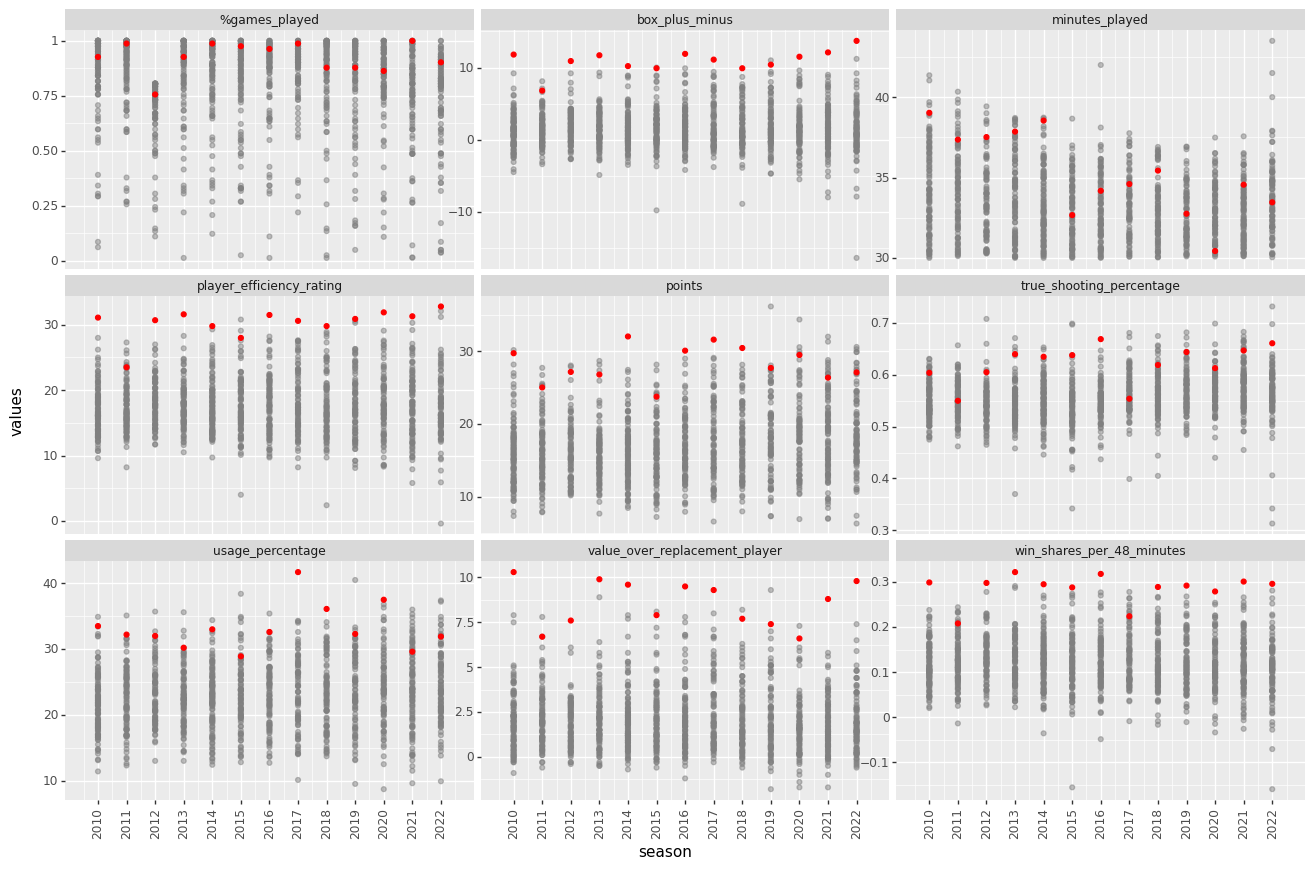

<ggplot: (948254205)>

In [55]:
custom_colours = {"1": "red", "0": "grey"}

g = (
    ggplot() 
    + geom_point(data = df_long[df_long["is_mvp"] != "1"], mapping = aes(x = "season", y = "values"), color = "grey", alpha = 0.5)
    + geom_point(data = df_long[df_long["is_mvp"] == "1"], mapping = aes(x = "season", y = "values"), color = "red")
    + facet_wrap("~metrics", scales = "free_y")
    + theme(axis_text_x = element_text(angle = 90), figure_size = (16, 10))
    + scale_x_continuous(breaks = range(2010, 2023), limits = (2010 - 0.5, 2022 + 0.5)) 
)

g